In [107]:
from pathlib import Path

BASE_DIR = Path("/content/data")
file_temp = BASE_DIR / "temperature_paris_era5_jan2023.nc"
file_irr  = BASE_DIR / "cams_ghi_clear_2023_01.nc"

print("Temp:", file_temp.exists(), file_temp)
print("Irr :", file_irr.exists(), file_irr)


Temp: True /content/data/temperature_paris_era5_jan2023.nc
Irr : True /content/data/cams_ghi_clear_2023_01.nc


In [108]:
from pathlib import Path

BASE_DIR = Path("/content/data")

BASE_DIR


PosixPath('/content/data')

In [109]:
from pathlib import Path

BASE_DIR = Path("/content/data")

print("Contenu du dossier /content/data :")
for f in BASE_DIR.iterdir():
    print(" -", f.name)


Contenu du dossier /content/data :
 - temperature_paris_era5_jan2023.nc
 - cams_ghi_clear_2023_01.nc


In [110]:
from pathlib import Path

BASE_DIR = Path("/content/data")

print("Le dossier existe :", BASE_DIR.exists())
print("Nombre de fichiers :", len(list(BASE_DIR.iterdir())))


Le dossier existe : True
Nombre de fichiers : 2


In [111]:
from pathlib import Path

BASE_DIR = Path("/content/data")

for f in BASE_DIR.iterdir():
    print(" -", f.name)


 - temperature_paris_era5_jan2023.nc
 - cams_ghi_clear_2023_01.nc


In [112]:
import zipfile
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

lat_paris = 48.8566
lon_paris = 2.3522

north, west, south, east = 49.10, 2.00, 48.60, 2.70

file_temp = "temperature_paris_era5_jan2023.nc"
file_cams = "cams_ghi_clear_2023_01.zip"
folder_cams = "extracted_cams_2023_01"


In [113]:
import os
os.listdir("/content")


['.config', 'sample_data', 'data', '.ipynb_checkpoints']

In [114]:
import glob
glob.glob("/content/**/*.nc", recursive=True)


['/content/data/temperature_paris_era5_jan2023.nc',
 '/content/data/cams_ghi_clear_2023_01.nc']

In [115]:
import os
os.listdir("/content")


['.config', 'sample_data', 'data', '.ipynb_checkpoints']

In [116]:
!pip install cdsapi


In [117]:
from pathlib import Path

Path.home().joinpath(".cdsapirc").write_text(
    "url: https://cds.climate.copernicus.eu/api\n"
    "key: 88:aa7421d6-bf16-4de3-b200-8104adb5dd87\n"
)

print("Fichier .cdsapirc créé ✅")


Fichier .cdsapirc créé ✅


In [118]:
import cdsapi
c = cdsapi.Client()
print("Connexion CDS OK ✅")


Connexion CDS OK ✅


In [119]:
!pip -q install --upgrade "cdsapi>=0.7.7"

from pathlib import Path

Path.home().joinpath(".cdsapirc").write_text(
    "url: https://cds.climate.copernicus.eu/api/v2\n"
    "key: aa7421d6-bf16-4de3-b200-8104adb5dd87\n"
)

print("✅ cdsapi mis à jour + .cdsapirc OK")


✅ cdsapi mis à jour + .cdsapirc OK


In [120]:
import os
print("Fichier présent :", "temperature_paris_era5_jan2023.nc" in os.listdir("/content"))


Fichier présent : False


In [121]:
from google.colab import files

files.download("/content/data/temperature_paris_era5_jan2023.nc")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [122]:
!pip -q install --upgrade cdsapi


In [123]:
from pathlib import Path

Path.home().joinpath(".cdsapirc").write_text(
    "url: https://cds.climate.copernicus.eu/api\n"
    "key: aa7421d6-bf16-4de3-b200-8104adb5dd87\n"
)

print("✅ .cdsapirc mis à jour (sans UID)")


✅ .cdsapirc mis à jour (sans UID)


In [124]:
import os

print("Contenu /content :", os.listdir("/content"))
print("Contenu /content/data :", os.listdir("/content/data") if os.path.exists("/content/data") else "❌ dossier /content/data introuvable")


Contenu /content : ['.config', 'sample_data', 'data', '.ipynb_checkpoints']
Contenu /content/data : ['temperature_paris_era5_jan2023.nc', 'cams_ghi_clear_2023_01.nc']


In [125]:
from pathlib import Path

# Cherche le fichier partout dans /content
matches = list(Path("/content").rglob("temperature_paris_era5_jan2023.nc"))

print("Trouvé :", len(matches), "fichier(s)")
for m in matches:
    print(" -", m)


Trouvé : 1 fichier(s)
 - /content/data/temperature_paris_era5_jan2023.nc


In [126]:
from pathlib import Path
import xarray as xr

BASE_DIR = Path("/content/data")
file_temp = BASE_DIR / "temperature_paris_era5_jan2023.nc"

print("Chemin utilisé :", file_temp)
print("Existe ?", file_temp.exists())

ds_temp = xr.open_dataset(file_temp)
ds_temp


Chemin utilisé : /content/data/temperature_paris_era5_jan2023.nc
Existe ? True


<xarray.Dataset> Size: 45kB
Dimensions:     (valid_time: 744, latitude: 3, longitude: 3)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2023-01-01 ... 2023-01-31T23:...
  * latitude    (latitude) float64 24B 49.1 48.85 48.6
  * longitude   (longitude) float64 24B 2.0 2.25 2.5
    number      int64 8B ...
    expver      (valid_time) <U4 12kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 27kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-20T21:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [127]:
import xarray as xr
import pandas as pd
from pathlib import Path

# --- Chemin correct du fichier ---
BASE_DIR = Path("/content/data")
file_temp = BASE_DIR / "temperature_paris_era5_jan2023.nc"

# Vérification
assert file_temp.exists(), "Fichier température introuvable"

# --- Ouverture du fichier ERA5 ---
ds_temp = xr.open_dataset(file_temp)

# Coordonnées Paris
lat_paris = 48.85
lon_paris = 2.35

# --- Sélection température 2m au point le plus proche ---
t2m = ds_temp["t2m"].sel(
    latitude=lat_paris,
    longitude=lon_paris,
    method="nearest"
)

# --- Conversion Kelvin → Celsius ---
t_celsius = t2m - 273.15

# --- Moyenne journalière ---
t_daily = t_celsius.resample(valid_time="1D").mean()

# --- DataFrame final ---
df_temp_daily = t_daily.to_series().to_frame(name="temperature_C")
df_temp_daily.index = df_temp_daily.index.date
df_temp_daily.index.name = "date"

df_temp_daily


,temperature_C
date,
2023-01-01,12.816180
2023-01-02,9.764694
2023-01-03,7.591146
2023-01-04,11.751565
2023-01-05,11.878518
2023-01-06,11.134925
2023-01-07,9.621644
2023-01-08,8.751957
2023-01-09,6.574132


In [128]:
df_temp_daily


,temperature_C
date,
2023-01-01,12.816180
2023-01-02,9.764694
2023-01-03,7.591146
2023-01-04,11.751565
2023-01-05,11.878518
2023-01-06,11.134925
2023-01-07,9.621644
2023-01-08,8.751957
2023-01-09,6.574132


In [129]:
from pathlib import Path

BASE_DIR = Path("/content/data")
BASE_DIR.mkdir(parents=True, exist_ok=True)

print("Dossier créé ✅ :", BASE_DIR)


Dossier créé ✅ : /content/data


In [130]:
from pathlib import Path

BASE_DIR = Path("/content/data")
print("Contenu du dossier data :")
for p in BASE_DIR.iterdir():
    print(" -", p.name)

file_temp = BASE_DIR / "temperature_paris_era5_jan2023.nc"
print("\nTempérature trouvée ✅ :", file_temp.exists())


Contenu du dossier data :
 - temperature_paris_era5_jan2023.nc
 - cams_ghi_clear_2023_01.nc

Température trouvée ✅ : True


In [131]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Dossier réel vu dans Colab
BASE_DIR = Path("/content/content/data")

file_temp = BASE_DIR / "temperature_paris_era5_jan2023.nc"
file_irr  = BASE_DIR / "cams_ghi_clear_2023_01.nc"

# Vérifications
print("Dossier data existe :", BASE_DIR.exists())
print("Fichier température :", file_temp.exists())
print("Fichier irradiance  :", file_irr.exists())


Dossier data existe : False
Fichier température : False
Fichier irradiance  : False


In [132]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Dossier de données dans Colab
BASE_DIR = Path("/content/data")

file_temp = BASE_DIR / "temperature_paris_era5_jan2023.nc"
file_irr  = BASE_DIR / "cams_ghi_clear_2023_01.nc"

# Vérif température
if not file_temp.exists():
    raise FileNotFoundError(f"Fichier température manquant : {file_temp}")

# Vérif irradiance (on affiche juste un message si manquant)
if not file_irr.exists():
    print(f"⚠️ Fichier irradiance manquant : {file_irr}")
    print("➡️ Ajoute le fichier cams_ghi_clear_2023_01.nc dans /content/data/ (upload).")
else:
    print("Fichiers locaux chargés avec succès ✅")


Fichiers locaux chargés avec succès ✅


In [133]:
import os
print(os.listdir("/content/data"))


['temperature_paris_era5_jan2023.nc', 'cams_ghi_clear_2023_01.nc']


In [134]:
import os
print(os.listdir("/content/data"))


['temperature_paris_era5_jan2023.nc', 'cams_ghi_clear_2023_01.nc']


In [135]:
import xarray as xr
import pandas as pd
from pathlib import Path

# --- chemins ---
BASE_DIR = Path("/content/data")
file_irr = BASE_DIR / "cams_ghi_clear_2023_01.nc"

# --- ouvrir le fichier CAMS ---
ds_irr = xr.open_dataset(file_irr)

# --- variable GHI ---
var_name = list(ds_irr.data_vars)[0]
ghi = ds_irr[var_name]

# --- point Paris ---
lat_paris = 48.85
lon_paris = 2.35

ghi_paris = ghi.sel(
    latitude=lat_paris,
    longitude=lon_paris,
    method="nearest"
)

# --- coordonnée temps ---
time_name = "time" if "time" in ghi_paris.coords else "valid_time"

# --- agrégation journalière ---
ghi_daily = ghi_paris.resample({time_name: "1D"}).mean()

df_irr_daily = ghi_daily.to_series().to_frame(name="irradiance_GHI")
df_irr_daily.index = pd.to_datetime(df_irr_daily.index).date
df_irr_daily.index.name = "date"

df_irr_daily


,irradiance_GHI
date,
2023-01-01,14.336842
2023-01-02,15.350000
2023-01-03,15.350000
2023-01-04,15.237500
2023-01-05,15.537500
2023-01-06,15.612500
2023-01-07,15.912500
2023-01-08,16.150000
2023-01-09,16.137500


In [136]:
import datetime as dt

df_daily = df_temp_daily.join(df_irr_daily, how="inner")

start = dt.date(2023, 1, 1)
end = dt.date(2023, 1, 31)

df_daily = df_daily.loc[start:end]

df_daily


,temperature_C,irradiance_GHI
date,,
2023-01-01,12.816180,14.336842
2023-01-02,9.764694,15.350000
2023-01-03,7.591146,15.350000
2023-01-04,11.751565,15.237500
2023-01-05,11.878518,15.537500
2023-01-06,11.134925,15.612500
2023-01-07,9.621644,15.912500
2023-01-08,8.751957,16.150000
2023-01-09,6.574132,16.137500


In [137]:
# Statistiques simples pour le mois de janvier

stats = pd.DataFrame({
    "Température moyenne (°C)": [df_daily["temperature_C"].mean()],
    "Température min (°C)": [df_daily["temperature_C"].min()],
    "Température max (°C)": [df_daily["temperature_C"].max()],
    "Irradiance moyenne": [df_daily["irradiance_GHI"].mean()],
    "Irradiance min": [df_daily["irradiance_GHI"].min()],
    "Irradiance max": [df_daily["irradiance_GHI"].max()],
})

stats


,Température moyenne (°C),Température min (°C),Température max (°C),Irradiance moyenne,Irradiance min,Irradiance max
0,5.793508,0.220163,12.81618,18.350382,14.336842,22.7625


In [138]:
# Jours remarquables

jour_plus_froid = df_daily["temperature_C"].idxmin()
jour_plus_chaud = df_daily["temperature_C"].idxmax()
jour_plus_irr = df_daily["irradiance_GHI"].idxmax()

jour_plus_froid, jour_plus_chaud, jour_plus_irr


(datetime.date(2023, 1, 22),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 1, 28))

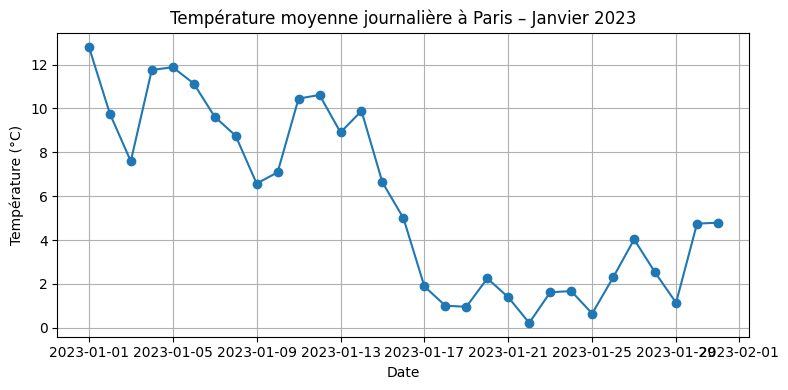

In [139]:
plt.figure(figsize=(8, 4))
plt.plot(df_daily.index, df_daily["temperature_C"], marker="o")

plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.title("Température moyenne journalière à Paris – Janvier 2023")
plt.grid(True)

plt.tight_layout()
plt.show()


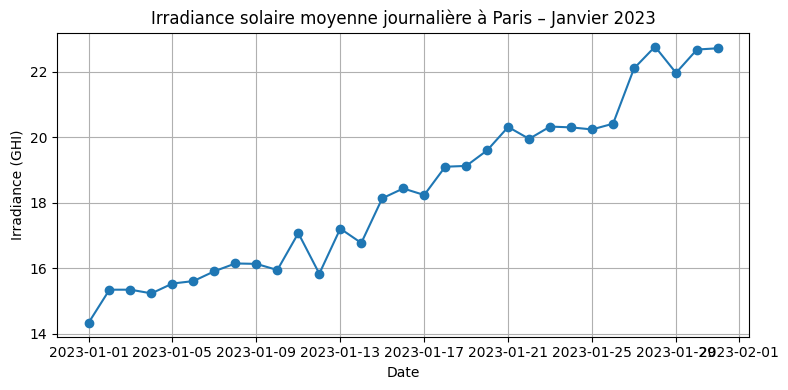

In [140]:
plt.figure(figsize=(8, 4))
plt.plot(df_daily.index, df_daily["irradiance_GHI"], marker="o")

plt.xlabel("Date")
plt.ylabel("Irradiance (GHI)")
plt.title("Irradiance solaire moyenne journalière à Paris – Janvier 2023")
plt.grid(True)

plt.tight_layout()
plt.show()


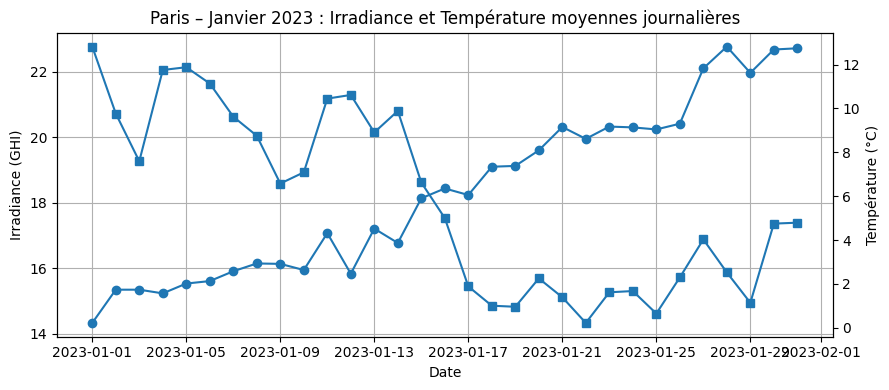

In [141]:
fig, ax1 = plt.subplots(figsize=(9, 4))

ax1.plot(df_daily.index, df_daily["irradiance_GHI"], marker="o")
ax1.set_xlabel("Date")
ax1.set_ylabel("Irradiance (GHI)")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df_daily.index, df_daily["temperature_C"], marker="s")
ax2.set_ylabel("Température (°C)")

plt.title("Paris – Janvier 2023 : Irradiance et Température moyennes journalières")
plt.tight_layout()
plt.show()


In [142]:
import xarray as xr
import pandas as pd
from pathlib import Path

# --- chemin du fichier ---
file_irr = Path("/content/data/cams_ghi_clear_2023_01.nc")

# --- ouvrir le NetCDF ---
ds_irr = xr.open_dataset(file_irr)

# --- variable irradiance ---
var_name = list(ds_irr.data_vars)[0]
ghi = ds_irr[var_name]

# --- coordonnées Paris ---
lat_paris = 48.85
lon_paris = 2.35

ghi_paris = ghi.sel(
    latitude=lat_paris,
    longitude=lon_paris,
    method="nearest"
)

# --- coordonnée temps ---
time_name = "time" if "time" in ghi_paris.coords else "valid_time"

# --- moyenne journalière ---
ghi_daily = ghi_paris.resample({time_name: "1D"}).mean()

df_irr_daily = ghi_daily.to_series().to_frame(name="irradiance_GHI")
df_irr_daily.index = pd.to_datetime(df_irr_daily.index).date
df_irr_daily.index.name = "date"

df_irr_daily


,irradiance_GHI
date,
2023-01-01,14.336842
2023-01-02,15.350000
2023-01-03,15.350000
2023-01-04,15.237500
2023-01-05,15.537500
2023-01-06,15.612500
2023-01-07,15.912500
2023-01-08,16.150000
2023-01-09,16.137500


In [143]:
# Export du tableau final (léger : 31 lignes)
df_daily.to_csv("paris_janvier_2023_daily.csv", index=True)


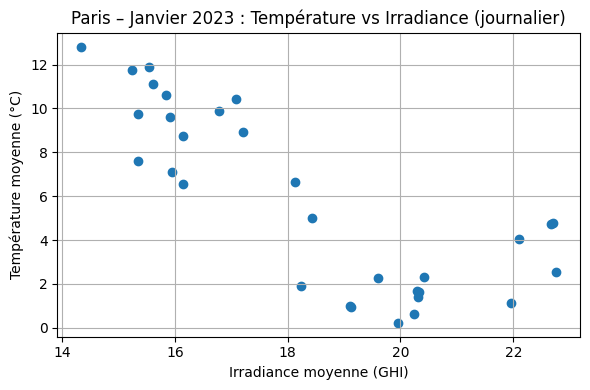

In [144]:
# Schéma (diagramme de dispersion) : relation irradiance vs température
plt.figure(figsize=(6, 4))
plt.scatter(df_daily["irradiance_GHI"], df_daily["temperature_C"])
plt.xlabel("Irradiance moyenne (GHI)")
plt.ylabel("Température moyenne (°C)")
plt.title("Paris – Janvier 2023 : Température vs Irradiance (journalier)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [145]:
# Conclusion automatique (texte)
jour_froid = df_daily["temperature_C"].idxmin()
jour_chaud = df_daily["temperature_C"].idxmax()
jour_irr = df_daily["irradiance_GHI"].idxmax()

texte = f"""
Bilan (Paris, Janvier 2023) :
- Température moyenne : {df_daily['temperature_C'].mean():.2f} °C
- Température min : {df_daily['temperature_C'].min():.2f} °C (le {jour_froid})
- Température max : {df_daily['temperature_C'].max():.2f} °C (le {jour_chaud})
- Irradiance moyenne : {df_daily['irradiance_GHI'].mean():.2f}
- Irradiance max : {df_daily['irradiance_GHI'].max():.2f} (le {jour_irr})

Remarque :
L’irradiance et la température ne varient pas toujours en même temps car la température dépend aussi
des masses d’air et des conditions météo des jours précédents.
"""
print(texte)



Bilan (Paris, Janvier 2023) :
- Température moyenne : 5.79 °C
- Température min : 0.22 °C (le 2023-01-22)
- Température max : 12.82 °C (le 2023-01-01)
- Irradiance moyenne : 18.35
- Irradiance max : 22.76 (le 2023-01-28)

Remarque :
L’irradiance et la température ne varient pas toujours en même temps car la température dépend aussi
des masses d’air et des conditions météo des jours précédents.

